<a href="https://colab.research.google.com/github/Aditya9790/Machine-Learning/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
health = '/content/drive/MyDrive/Colab Notebooks/healthdrink.xlsx'
health_df = pd.read_excel(health)

#Linear Regression one Variable
Build a model that calculates the salary of the person

## Taking insights from the data

In [ ]:
mba_file = '/content/drive/MyDrive/Colab Notebooks/MBA Salary.csv'
mba_salary_df = pd.read_csv(mba_file)
mba_salary_df.head()

,S. No.,Percentage in Grade 10,Salary
0,1,62.00,270000
1,2,76.33,200000
2,3,72.00,240000
3,4,60.00,250000
4,5,61.00,180000


In [ ]:
# get more insights about data
# As all values are numerical so no needed for preprocessing
mba_salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   S. No.                  50 non-null     int64  
 1   Percentage in Grade 10  50 non-null     float64
 2   Salary                  50 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.3 KB


Import staysmodel.api to estimate the regression coefficient $\beta_0$ and $\beta_1$ <br>
Regression line will be 
$Y$ = $\beta_0$ + $\beta_1$$x$ + $\epsilon$

The OLS API will only estimate coefficient of X parameter $i.e.$ $\beta_1$. <br>
So to get $\beta_0$ we will add a constant $1$ throughout the column.

In [ ]:
# Here X is feature set/dependent variable and 
# Outcome variable is Y

import statsmodels.api as sm
X = sm.add_constant(mba_salary_df['Percentage in Grade 10'])
X.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,const,Percentage in Grade 10
0,1.0,62.00
1,1.0,76.33
2,1.0,72.00
3,1.0,60.00
4,1.0,61.00


In [ ]:
Y = mba_salary_df['Salary'] # dependent variable
Y.head()

0    270000
1    200000
2    240000
3    250000
4    180000
Name: Salary, dtype: int64

## Split data into training, test and fit the model

1. Now split the data randomly into training and validation set
2. Trainig Data = Data used for model training
> a. train_X = Training data of independent var<br>
> b. train_Y = Training data of dependent var
3. test Data = Data on which model will be tested after training
> a. test_X = test data for $X$ $i.e.$ independent var<br>
> b. test_Y = test data for $Y$ $i.e.$ dependent var<br>


X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=\*, random_state=\*) <br>

train_test_split takes four parameters

1. X = Value of X
2. Y = Value of Y
3. test_size = Size of training data in % here 80% of data is used for training so 0.8
4. random_stats = If we want to select our data randomly, generally taken as 42.<br>

Now with use of OLS function and *fit*  method we will build the model.<br>

sm.OLS takes two parameters **train_Y, train_X** this data is used for training the model.<br>
1. First parameter train_Y = dependent variable
2. Second Parameter train_X = The independent variable matrix $i.e.$ **X** in our case.


In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, train_size = 0.8, random_state = 42)

#print(len(train_X['const']), len(train_Y))

# model_fitting
mba_salary_LRM = sm.OLS(train_Y, train_X).fit()


In [ ]:
# here const = β0 and Percentage in Grade 10 = β1
print(mba_salary_LRM.params)

const                     106610.493930
Percentage in Grade 10      2374.229302
dtype: float64


MBA _salary = $\beta_0$ +$\beta_1x$

MBA_salary = $const$ + $(Percentage\_in \_Grade\_10)x$ <br><br>

## Following are the steps taken to validate our/ Diagnose our Model:<br>

1. Co-efficient of determination ($R^2$)
2. Hypothests testing for Regression Coefficients
3. Analysis of variance for overall model validity (ANOVA)(Mostly done for multiple Regression)
4. Residual Analysis to validate the regression model assumptions
5. Outlier Analysis

In [ ]:
#1. Co-efficient of determination ( R^2 )
# here R^2 is 0.092
mba_salary_LRM.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                    OLS                   Adj. R-squared:          0.068     
Dependent Variable:       Salary                AIC:                     1012.9356 
Date:                     2021-12-05 04:18      BIC:                     1016.3133 
No. Observations:         40                    Log-Likelihood:          -504.47   
Df Model:                 1                     F-statistic:             3.830     
Df Residuals:             38                    Prob (F-statistic):      0.0577    
R-squared:                0.092                 Scale:                   5.5486e+09
-----------------------------------------------------------------------------------
                          Coef.     Std.Err.    t    P>|t|     [0.025      0.975]  
-----------------------------------------------------------------------------------
const                  106610.4939 78693.8223 1.3548 0.1835 -52696.8208 265917.8087
Percentage in Grade 10   2374.2293  1213.1166 1.9571 0.0577    -81.5968   4830.0554
-----------------------------------------------------------------------------------
Omnibus:                    0.978              Durbin-Watson:                 2.242
Prob(Omnibus):              0.613              Jarque-Bera (JB):              0.903
Skew:                       0.147              Prob(JB):                      0.637
Kurtosis:                   2.326              Condition No.:                 434  
===================================================================================

"""

Here $p-value > \alpha$<br>
There is relation between $X$ and $Y$

## Residual Analysis

While doing Residual Analysis Check:

1. Errors Normally distributed or not = This can be checked by using p-p plot
2. Variance of error is constant (Homoscedasticity
) if $\sigma^2$ not constant then called Heteroscedasticity
3. Functional form  of regression is correct
4. No outliers

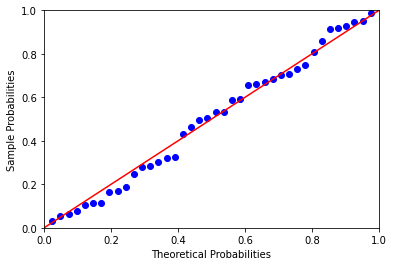

In [ ]:
# Check Normal Distribution of Errors 
# Draw P-P Plot(Probability-Probability Plot) of residuals
# Residuals are CDF of two probab distributions
# i.e. theoretical probab vs sample probab

# If the PP Plot is along the 45 degree line then we can say that 
# the error follow normal distribution
residuals = mba_salary_LRM.resid
pp_plot = sm.ProbPlot(residuals)
pp_plot.ppplot(line = '45')
plt.show()

In [ ]:
mba_salary_LRM.resid.head()

12    164690.372155
4     -71438.481336
37      5929.582379
8     121803.319885
3        935.747965
dtype: float64

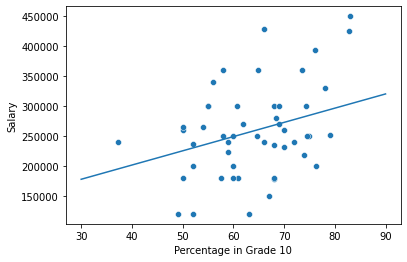

In [ ]:
X = np.linspace(30, 90, 100)
Y = mba_salary_LRM.params[0] + np.dot(X, mba_salary_LRM.params[1])
sns.scatterplot(data = mba_salary_df, y = 'Salary', x = 'Percentage in Grade 10')
plt.plot(X, Y)

Text(0.5, 1.0, 'Fig: Residual Plot')

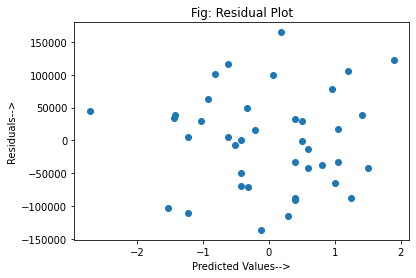

In [ ]:
# Variance of residuals constant (Homo scedasticity)
def get_standard_values(vals):
    return ((vals-vals.mean())/vals.std())

plt.scatter(get_standard_values(mba_salary_LRM.fittedvalues), residuals)
plt.xlabel('Predicted Values-->')
plt.ylabel('Residuals-->')
plt.title('Fig: Residual Plot')
# Since plot is not scattered therefore the variance of the 
# residuals is constant.

## Outlier Analysis Methods

1. Z-Score
2. Mahalanobis Distance
3. Cook's Distance
4. Leverage Values

\begin{align}
        Z-Score = \frac{Y_i - \bar{Y}}{\sigma_Y}
    \end{align}<br>

If the z-score is between 3 and -3 then that observation is not an outlier.


In [ ]:
# Z-Score is the distance of the observation from mean of data
from scipy.stats import zscore
mba_salary_df['z_score'] = zscore(mba_salary_df.Salary)
mba_salary_df[(mba_salary_df.z_score > 3.0) | (mba_salary_df.z_score < -3.0)]

,S. No.,Percentage in Grade 10,Salary,z_score


Since no values are beyonf the interval [-3.0, 3.0] so we do not get any output that means that there aren't any outliers in the given data

## Accuracy of model and performing prediction

Predction is made on test data and based on it the accuracy is calculated

In [ ]:
# Model Variable is mba_salary_LRM
# we will predict on X as we are predicting based on the 
# given values of X
pred_y = mba_salary_LRM.predict(test_X)
pred_y

13    303671.525975
39    230070.417621
30    284677.691561
45    243318.617125
17    269007.778169
48    263309.627845
26    225321.959017
25    259985.706823
32    237193.105526
19    246690.022733
dtype: float64

Measuring Accuracy

1. Mean Square Error (MSE)
2. Root Mean Squared Error (RMSE)
3. Mean Absolute Percentage Error (MAPE)<br>

This can be calculated with the help of **sklearn.matrics** liabrary

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
# Error is calculated from two parameters
# first test_Y(test data) and second pred_y(predicted value of Y)
r2_error = np.abs(r2_score(test_Y, pred_y))
r2_error

0.3805122592921434

Since r2_error = 0.1566458 <br>
that means there is  $15.66\%$ deviation from the origional or in the validation set

## RMSE = Root Mean Squared Error

\begin{align}
        RMSE = \sqrt[2]{mean({Y-Y_i})}
    \end{align}<br>

$Y = Actual\ value\  from\   test data$<br>
$Y_i = Predicted\  value\  from\  model$

In [ ]:
# RMSE = Root Mean Squared Error
# Lower the RMSE better the model
# test_Y = actual value & pred_Y = calculated from model
rmse = np.sqrt(mean_squared_error(test_Y, pred_y))
rmse

58996.22616661721

Here RMSE = 73458.04 which is quite high so our model is not actually very good

# Multiple Regression
Build the model from the data that predicts the sold price of a player.

##Taking insights from data

Our model will look like:<br>
$Y_i = \beta_0 + \beta_1x_{1i} + \beta_2x_{2i}+......+\beta_nx_{ni}$

In [ ]:
ipl_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IPL IMB381IPL2013.csv')
ipl_df.head()

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,CAPTAINCY EXP,RUNS-S,HS,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,0,0.0,0,0,0,0.00,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,185,37.6,0,0,0,0.00,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,288,32.9,0,167,39,18.56,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,51,36.8,0,58,11,5.80,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,0,0.0,0,1317,71,32.93,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000


Get the basic information from data and delete un necessary data like Sr No, Name that has no role to play in prediction.

In [ ]:
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sl.NO.         130 non-null    int64  
 1   PLAYER NAME    130 non-null    object 
 2   AGE            130 non-null    int64  
 3   COUNTRY        130 non-null    object 
 4   TEAM           130 non-null    object 
 5   PLAYING ROLE   130 non-null    object 
 6   T-RUNS         130 non-null    int64  
 7   T-WKTS         130 non-null    int64  
 8   ODI-RUNS-S     130 non-null    int64  
 9   ODI-SR-B       130 non-null    float64
 10  ODI-WKTS       130 non-null    int64  
 11  ODI-SR-BL      130 non-null    float64
 12  CAPTAINCY EXP  130 non-null    int64  
 13  RUNS-S         130 non-null    int64  
 14  HS             130 non-null    int64  
 15  AVE            130 non-null    float64
 16  SR-B           130 non-null    float64
 17  SIXERS         130 non-null    int64  
 18  RUNS-C    

## Choose relevant parameters
Only take relevant features and store it in X_features.

Using $data\_frame\_name['Param\_Name'].unique()$ we can get all the categories in the particular column.<br>

Here in Playing Role we have Allrounder, Bowler, etc

In [ ]:
X_features = ['AGE', 'COUNTRY', 'PLAYING ROLE',
       'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C',
       'WKTS', 'AVE-BL', 'ECON', 'SR-BL']

# We need to encode categorical variables like COUNTRY, CAPTAINCY so that we can predict
ipl_df['PLAYING ROLE'].unique()

array(['Allrounder', 'Bowler', 'Batsman', 'W. Keeper'], dtype=object)

In [ ]:
# Create a dummy variable for Playing Role

pd.get_dummies(ipl_df['PLAYING ROLE'], drop_first=True).head(5)

,Batsman,Bowler,W. Keeper
0,0,0,0
1,0,1,0
2,0,1,0
3,0,1,0
4,1,0,0


In [ ]:
# We will create n-1 dummy variables as we did for PLAYING ROLE
pd.get_dummies(ipl_df['PLAYING ROLE'], drop_first=True).head()

categorical_features = ['AGE', 'COUNTRY', 'PLAYING ROLE', 'CAPTAINCY EXP']

# pd.get_dummies(data_frame, columns)
# here we have to mention column names of the columns
# on which we want to do encoding
ipl_df_encoded = pd.get_dummies(ipl_df[X_features], columns = categorical_features, drop_first=True)
ipl_df_encoded.head()

,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,RUNS-S,HS,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AGE_2,AGE_3,COUNTRY_BAN,COUNTRY_ENG,COUNTRY_IND,COUNTRY_NZ,COUNTRY_PAK,COUNTRY_SA,COUNTRY_SL,COUNTRY_WI,COUNTRY_ZIM,PLAYING ROLE_Batsman,PLAYING ROLE_Bowler,PLAYING ROLE_W. Keeper,CAPTAINCY EXP_1
0,0,0,0,0.00,0,0.0,0,0,0.00,0.00,0,307,15,20.47,8.90,13.93,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,214,18,657,71.41,185,37.6,0,0,0.00,0.00,0,29,0,0.00,14.50,0.00,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,571,58,1269,80.62,288,32.9,167,39,18.56,121.01,5,1059,29,36.52,8.81,24.90,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,284,31,241,84.56,51,36.8,58,11,5.80,76.32,0,1125,49,22.96,6.23,22.14,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,63,0,79,45.93,0,0.0,1317,71,32.93,120.71,28,0,0,0.00,0.00,0.00,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [ ]:
# All the categorical variables will be changes into numerical variables
ipl_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   T-RUNS                  130 non-null    int64  
 1   T-WKTS                  130 non-null    int64  
 2   ODI-RUNS-S              130 non-null    int64  
 3   ODI-SR-B                130 non-null    float64
 4   ODI-WKTS                130 non-null    int64  
 5   ODI-SR-BL               130 non-null    float64
 6   RUNS-S                  130 non-null    int64  
 7   HS                      130 non-null    int64  
 8   AVE                     130 non-null    float64
 9   SR-B                    130 non-null    float64
 10  SIXERS                  130 non-null    int64  
 11  RUNS-C                  130 non-null    int64  
 12  WKTS                    130 non-null    int64  
 13  AVE-BL                  130 non-null    float64
 14  ECON                    130 non-null    fl

In [ ]:
# Reassign all the encoded columns to X-Features so that
# X_features will be having these new features
# We have changes X_features
X_features = ipl_df_encoded.columns
X_features

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'AGE_3', 'COUNTRY_BAN', 'COUNTRY_ENG',
       'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL',
       'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

## Start Building the model

In [ ]:
import statsmodels.api as sm
# X is a set of independent variables
# we will add constant to our processed dataset which is
# ipl_df_encoded
X = sm.add_constant(ipl_df_encoded)
# Dependent Variable
Y = ipl_df['SOLD PRICE']

from sklearn.model_selection import train_test_split

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, train_size = 0.8, random_state = 42)

# Actual Model

ipl_model = sm.OLS(train_Y, train_X).fit()

In [ ]:
test_X.head()
#test_Y.head()

,const,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,RUNS-S,HS,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AGE_2,AGE_3,COUNTRY_BAN,COUNTRY_ENG,COUNTRY_IND,COUNTRY_NZ,COUNTRY_PAK,COUNTRY_SA,COUNTRY_SL,COUNTRY_WI,COUNTRY_ZIM,PLAYING ROLE_Batsman,PLAYING ROLE_Bowler,PLAYING ROLE_W. Keeper,CAPTAINCY EXP_1
55,1.0,1451,310,1100,82.45,377,29.2,103,25,11.44,121.18,6,1009,21,48.05,7.56,38.24,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
40,1.0,1944,2,10,43.47,0,0.0,130,50,16.25,107.44,3,0,0,0.00,0.00,0.00,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
19,1.0,654,11,2536,84.00,25,47.6,978,74,36.22,119.27,35,377,10,37.70,7.11,31.80,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
31,1.0,199,46,48,100.00,44,23.4,115,17,10.45,107.48,3,975,44,22.16,7.71,17.27,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
115,1.0,541,157,368,69.04,154,32.2,39,24,13.00,205.26,5,184,12,15.33,8.17,11.20,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [ ]:
# These are the parameters balues of B0, B1, ..., Bn
print(ipl_model.params)

const                     375827.199059
T-RUNS                       -53.789030
T-WKTS                      -132.596723
ODI-RUNS-S                    57.959956
ODI-SR-B                    -524.144970
ODI-WKTS                     815.394424
ODI-SR-BL                   -773.309199
RUNS-S                       114.720547
HS                         -5516.335398
AVE                        21560.275955
SR-B                       -1324.721784
SIXERS                      4264.100109
RUNS-C                        69.825020
WKTS                        3075.242189
AVE-BL                      5182.933487
ECON                       -6820.778058
SR-BL                      -7658.809364
AGE_2                    -230767.646329
AGE_3                    -216827.080829
COUNTRY_BAN              -122103.519643
COUNTRY_ENG               672410.765359
COUNTRY_IND               155306.401120
COUNTRY_NZ                194218.912037
COUNTRY_PAK                75921.766953
COUNTRY_SA                 64283.389419


In [ ]:
ipl_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                     OLS                     Adj. R-squared:            0.362     
Dependent Variable:        SOLD PRICE              AIC:                       2965.2841 
Date:                      2021-12-05 04:18        BIC:                       3049.9046 
No. Observations:          104                     Log-Likelihood:            -1450.6   
Df Model:                  31                      F-statistic:               2.883     
Df Residuals:              72                      Prob (F-statistic):        0.000114  
R-squared:                 0.554                   Scale:                     1.1034e+11
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
const                   375827.1991 228849.9306  1.6422 0.1049  -80376.7996  832031.1978
T-RUNS                     -53.7890     32.7172 -1.6441 0.1045    -119.0096      11.4316
T-WKTS                    -132.5967    609.7525 -0.2175 0.8285   -1348.1162    1082.9228
ODI-RUNS-S                  57.9600     31.5071  1.8396 0.0700      -4.8482     120.7681
ODI-SR-B                  -524.1450   1576.6368 -0.3324 0.7405   -3667.1130    2618.8231
ODI-WKTS                   815.3944    832.3883  0.9796 0.3306    -843.9413    2474.7301
ODI-SR-BL                 -773.3092   1536.3334 -0.5033 0.6163   -3835.9338    2289.3154
RUNS-S                     114.7205    173.3088  0.6619 0.5101    -230.7643     460.2054
HS                       -5516.3354   2586.3277 -2.1329 0.0363  -10672.0855    -360.5853
AVE                      21560.2760   7774.2419  2.7733 0.0071    6062.6080   37057.9439
SR-B                     -1324.7218   1373.1303 -0.9647 0.3379   -4062.0071    1412.5635
SIXERS                    4264.1001   4089.6000  1.0427 0.3006   -3888.3685   12416.5687
RUNS-C                      69.8250    297.6697  0.2346 0.8152    -523.5687     663.2187
WKTS                      3075.2422   7262.4452  0.4234 0.6732  -11402.1778   17552.6622
AVE-BL                    5182.9335  10230.1581  0.5066 0.6140  -15210.5140   25576.3810
ECON                     -6820.7781  13109.3693 -0.5203 0.6045  -32953.8282   19312.2721
SR-BL                    -7658.8094  14041.8735 -0.5454 0.5871  -35650.7726   20333.1539
AGE_2                  -230767.6463 114117.2005 -2.0222 0.0469 -458256.1279   -3279.1648
AGE_3                  -216827.0808 152246.6232 -1.4242 0.1587 -520325.1772   86671.0155
COUNTRY_BAN            -122103.5196 438719.2796 -0.2783 0.7816 -996674.4194  752467.3801
COUNTRY_ENG             672410.7654 238386.2220  2.8207 0.0062  197196.5172 1147625.0135
COUNTRY_IND             155306.4011 126316.3449  1.2295 0.2229  -96500.6302  407113.4325
COUNTRY_NZ              194218.9120 173491.9293  1.1195 0.2667 -151630.9280  540068.7521
COUNTRY_PAK              75921.7670 193463.5545  0.3924 0.6959 -309740.7804  461584.3143
COUNTRY_SA               64283.3894 144587.6773  0.4446 0.6579 -223946.8775  352513.6563
COUNTRY_SL               17360.1530 176333.7497  0.0985 0.9218 -334154.7526  368875.0586
COUNTRY_WI               10607.7792 230686.7892  0.0460 0.9635 -449257.9303  470473.4887
COUNTRY_ZIM            -145494.4793 401505.2815 -0.3624 0.7181 -945880.6296  654891.6710
PLAYING ROLE_Batsman     75724.7643 150250.0240  0.5040 0.6158 -223793.1844  375242.7130
PLAYING ROLE_Bowler      15395.8752 126308.1272  0.1219 0.9033 -236394.7744  267186.5249
PLAYING ROLE_W. Keeper  -71358.6280 213585.7444 -0.3341 0.7393 -497134.0278  354416.7718
CAPTAINCY EXP_1         164113.3972 123430.6353  1.3296 0.1878  -81941.0772  410167.8716
----------------------------------------------------------------

From the above summary we get that<br>the features **HS, AVE, AGE_2** have $p-value < 0.05$, so these three features influence the sold price to a very great extent then any other parameters.<br>

So this may happen due to multicollinearity and this is undesirable, we need to minimise this.<br>
This may destabalize our model.<br>
We will use variance inflation factor to determine the multi colimearity.<br>

The parameters which have $vif>4$ will destabalize the model.

## Variance Inflation factor Analysis


In [ ]:
# import variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
# X_matrix = X.to_numpy()
#X.head()
# X_matrix[1][1]
def get_vif(X):
    X_matrix = X.to_numpy()
    vif = [variance_inflation_factor(X_matrix, i) for i in range(X_matrix.shape[1])]
    vif_factors = pd.DataFrame()
    vif_factors['column'] = X.columns
    vif_factors['VIF'] = vif
    return vif_factors

vif_factors = get_vif(X[X_features])
vif_factors

,column,VIF
0,T-RUNS,12.612694
1,T-WKTS,7.679284
2,ODI-RUNS-S,16.426209
3,ODI-SR-B,13.829376
4,ODI-WKTS,9.951800
5,ODI-SR-BL,4.426818
6,RUNS-S,16.135407
7,HS,22.781017
8,AVE,25.226566
9,SR-B,21.576204


In [ ]:
# Get the name of columns that have VIF>4
large_vif = vif_factors[vif_factors.VIF>4].column
large_vif

0                   T-RUNS
1                   T-WKTS
2               ODI-RUNS-S
3                 ODI-SR-B
4                 ODI-WKTS
5                ODI-SR-BL
6                   RUNS-S
7                       HS
8                      AVE
9                     SR-B
10                  SIXERS
11                  RUNS-C
12                    WKTS
13                  AVE-BL
14                    ECON
15                   SR-BL
16                   AGE_2
20             COUNTRY_IND
27    PLAYING ROLE_Batsman
30         CAPTAINCY EXP_1
Name: column, dtype: object

Text(0.5, 1.0, 'Fig: Heatmap -correlation between features')

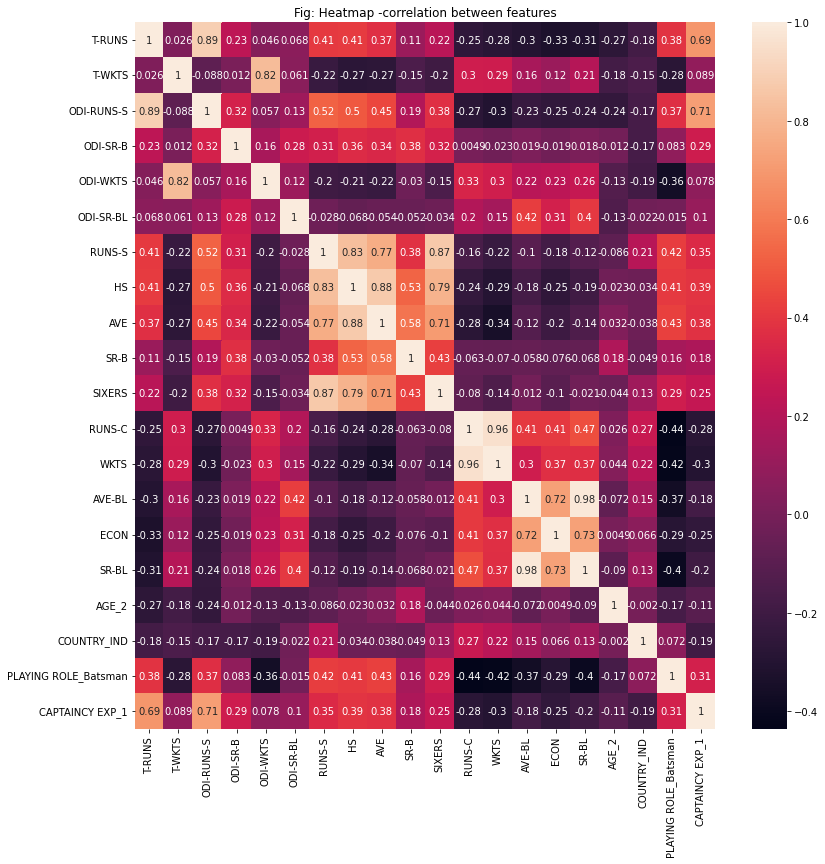

In [ ]:
# plot the heatmap
plt.figure(figsize=(13,13))
sns.heatmap(X[large_vif].corr(), annot = True)
plt.title("Fig: Heatmap -correlation between features")

Various variables like T-runs and ODI_runs have high correlation, so we will keep only one column from each group of highly correlated variables and remove others.

## Setting the significant Features

In [ ]:
columns_to_be_removed = ['T-RUNS','ODI-RUNS-S', 'T-WKTS','ODI-WKTS','RUNS-S','HS','AVE', 'RUNS-C','ECON','SR-BL']

In [ ]:
X_new_features = list(set(X_features)-set(columns_to_be_removed))
get_vif(X[X_new_features])

,column,VIF
0,PLAYING ROLE_Batsman,3.462782
1,CAPTAINCY EXP_1,2.348452
2,WKTS,3.080572
3,COUNTRY_IND,3.708583
4,SR-B,14.821076
5,PLAYING ROLE_Bowler,3.141541
6,COUNTRY_SL,1.592092
7,COUNTRY_SA,1.733537
8,COUNTRY_ZIM,1.213853
9,AVE-BL,4.129097


Still there are some parameters which have $vif>4$ so we will remove some columns that have high correlation and again check for vif.

In [ ]:
columns_to_be_removed = ['SR-B','ODI-SR-B','ODI-SR-BL','AGE_2']
X_new_features = list(set(X_new_features) - set(columns_to_be_removed))
get_vif(X[X_new_features])

,column,VIF
0,PLAYING ROLE_Batsman,2.593379
1,CAPTAINCY EXP_1,2.237820
2,AGE_3,1.524975
3,WKTS,2.761003
4,COUNTRY_IND,3.583523
5,COUNTRY_WI,1.181617
6,PLAYING ROLE_Bowler,2.908801
7,COUNTRY_SL,1.375878
8,COUNTRY_SA,1.492678
9,COUNTRY_BAN,1.066109


## Building the model with new parameters

In [ ]:
# change the train set
train_X = train_X[X_new_features]

# again build the model
ipl_model = sm.OLS(train_Y, train_X).fit()

# Build Model
ipl_model.summary2()


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
=======================================================================================
Model:                     OLS                Adj. R-squared (uncentered):   0.725     
Dependent Variable:        SOLD PRICE         AIC:                           2965.5880 
Date:                      2021-12-05 04:18   BIC:                           3010.5426 
No. Observations:          104                Log-Likelihood:                -1465.8   
Df Model:                  17                 F-statistic:                   17.13     
Df Residuals:              87                 Prob (F-statistic):            7.08e-21  
R-squared (uncentered):    0.770              Scale:                         1.2220e+11
---------------------------------------------------------------------------------------
                          Coef.      Std.Err.     t    P>|t|     [0.025       0.975]   
---------------------------------------------------------------------------------------
PLAYING ROLE_Batsman    91651.9762 106759.5943  0.8585 0.3930 -120544.2776  303848.2299
CAPTAINCY EXP_1        258506.8071  92731.3361  2.7877 0.0065   74193.2355  442820.3787
AGE_3                   51661.2173  90309.6188  0.5720 0.5688 -127838.9288  231161.3635
WKTS                     2789.6453   2097.4189  1.3300 0.1870   -1379.2019    6958.4925
COUNTRY_IND            267309.2147 106263.1659  2.5155 0.0137   56099.6662  478518.7632
COUNTRY_WI              -2509.9286 213772.6677 -0.0117 0.9907 -427406.2533  422386.3961
PLAYING ROLE_Bowler     27401.9154 102642.4924  0.2670 0.7901 -176611.1525  231414.9833
COUNTRY_SL             101956.8091 139449.1974  0.7311 0.4667 -175213.5704  379127.1887
COUNTRY_SA             105352.4751 118999.9625  0.8853 0.3784 -131172.8359  341877.7860
COUNTRY_BAN             22598.0846 364333.3020  0.0620 0.9507 -701553.8036  746749.9728
COUNTRY_ZIM            -35572.5380 388259.1090 -0.0916 0.9272 -807279.5583  736134.4823
PLAYING ROLE_W. Keeper -97934.2691 170869.1793 -0.5732 0.5680 -437555.2649  241686.7268
AVE-BL                   1810.8313   1831.9323  0.9885 0.3257   -1830.3325    5451.9951
COUNTRY_NZ             140346.5481 155498.4925  0.9026 0.3693 -168723.5433  449416.6395
COUNTRY_ENG            688721.8589 219634.0871  3.1358 0.0023  252175.3285 1125268.3893
SIXERS                   8025.2973   2119.9238  3.7857 0.0003    3811.7191   12238.8755
COUNTRY_PAK            155660.8457 159220.3591  0.9776 0.3310 -160806.8586  472128.5499
---------------------------------------------------------------------------------------
Omnibus:                      8.975               Durbin-Watson:                  2.363
Prob(Omnibus):                0.011               Jarque-Bera (JB):               8.840
Skew:                         0.616               Prob(JB):                       0.012
Kurtosis:                     3.724               Condition No.:                  469  
=======================================================================================

"""

As we have removed the multocolinearity problem by using vls function.

Now we again considers parameters which have $p<0.05$<br>
These are: COUNTRY_ENG, SIXERS, CAPTAINCY EXP_1, COUNTRY_IND

In [ ]:
X_significant = ['COUNTRY_ENG', 'SIXERS', 'CAPTAINCY EXP_1', 'COUNTRY_IND']
# Update the training set
train_X = train_X[X_significant]

# again build the model
ipl_model = sm.OLS(train_Y, train_X).fit()

# Build Model
ipl_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.704     
Dependent Variable:     SOLD PRICE       AIC:                         2961.8089 
Date:                   2021-12-05 04:18 BIC:                         2972.3864 
No. Observations:       104              Log-Likelihood:              -1476.9   
Df Model:               4                F-statistic:                 62.77     
Df Residuals:           100              Prob (F-statistic):          1.97e-26  
R-squared (uncentered): 0.715            Scale:                       1.3164e+11
--------------------------------------------------------------------------------
                     Coef.      Std.Err.    t    P>|t|     [0.025      0.975]   
--------------------------------------------------------------------------------
COUNTRY_ENG       731833.6386 214164.4988 3.4172 0.0009 306937.3727 1156729.9045
SIXERS              8637.8344   1675.1313 5.1565 0.0000   5314.4216   11961.2472
CAPTAINCY EXP_1   359725.2741  74930.3460 4.8008 0.0000 211065.6018  508384.9463
COUNTRY_IND       387890.2538  63007.1511 6.1563 0.0000 262885.8606  512894.6471
--------------------------------------------------------------------------------
Omnibus:                   1.130             Durbin-Watson:                2.238
Prob(Omnibus):             0.568             Jarque-Bera (JB):             0.874
Skew:                      0.223             Prob(JB):                     0.646
Kurtosis:                  3.046             Condition No.:                165  
================================================================================

"""

In [ ]:
# Parameters of new model
ipl_model.params

COUNTRY_ENG        731833.638616
SIXERS               8637.834426
CAPTAINCY EXP_1    359725.274051
COUNTRY_IND        387890.253821
dtype: float64

## Residual Analysis

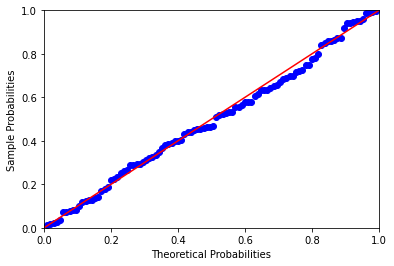

In [ ]:
# Check Normal Distribution of Residuals

#Probability - Probability plot (P-P plot)

residuals_ipl = ipl_model.resid
ppplot = sm.ProbPlot(residuals_ipl)
ppplot.ppplot(line = '45')
plt.show()

As the residuals are along 45 degree so the error is normally distributed

Text(0, 0.5, 'Residual Values')

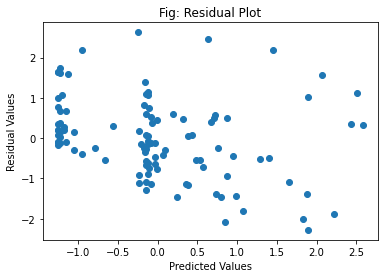

In [ ]:
# Check Variance of residual is constant(Homoscedasticity)

def get_standar_values(vals):
    return (vals - vals.mean())/vals.std()

plt.scatter(get_standar_values(ipl_model.fittedvalues),get_standar_values(residuals_ipl))
plt.title("Fig: Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residual Values")

## Detect Influencers and Outliers


We will use method for Leverage  Values method

If $Leverage\ value > \frac{3k+1}{n}$ then these are not outliers and they will be highly influential observations.<br>
$k$ = Columns of training data<br>
$n$ = Rows of training data

In [ ]:
k = train_X.shape[1] # length of columns these are number of significant parameters
n = train_Y.shape[0] # length of rows

print("Number of variables or significant parameters: ", k, "\nNumber of observations of number of training Y: ", n)

leverage_cutoff = (3*(k+1))/n
print("Cutoff for leverage value: ", round(leverage_cutoff, 3))

Number of variables or significant parameters:  4 
Number of observations of number of training Y:  104
Cutoff for leverage value:  0.144


The observations which have $leverage \ value>0.144$ are highly influential observations.<br>
We will plot it using influence plot

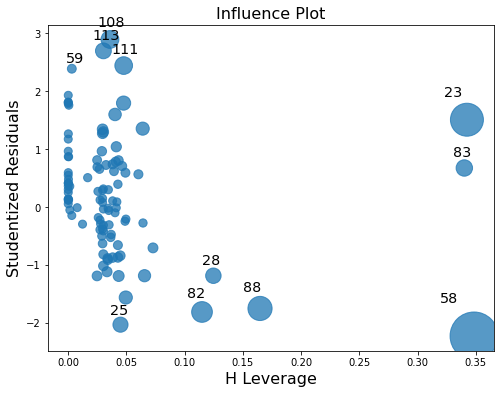

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
fig, axes = plt.subplots(figsize=(8, 6))
influence_plot(ipl_model, ax = axes)
plt.show()

From the graph we get that there are 3 observations which we need to filter out<br>
We will filter out 23, 83, 58 observations

In [ ]:
# these 3 observation do not have large residuals
# we may drop this if we wish to
ipl_df[ipl_df.index.isin([23, 58, 83])]

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,CAPTAINCY EXP,RUNS-S,HS,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
23,24,"Flintoff, A",2,ENG,CSK,Allrounder,3845,226,3394,88.82,169,33.2,1,62,24,31.00,116.98,2,105,2,52.50,9.55,33.00,2009,950000,1550000
58,59,"Mascarenhas, AD",2,ENG,RR+,Allrounder,0,0,245,95.33,13,63.2,0,74,27,8.22,101.37,1,331,19,17.42,7.01,14.95,2011,100000,100000
83,84,"Pietersen, KP",2,ENG,RCB+,Batsman,6654,5,4184,86.76,7,57.1,1,634,103,42.27,141.20,30,215,7,30.71,7.41,24.86,2009,1350000,1550000


## Prediction of Sold Price

In [ ]:
# pass the various significant parameters like
# SIXERS, etc to predict function
# bvased on the estimated values our model will
# predict the output based on testing data
pred_y = ipl_model.predict(test_X[train_X.columns])
pred_y

55     5.182701e+04
40     4.138038e+05
19     3.023242e+05
31     2.591350e+04
115    4.318917e+04
56     7.774051e+04
69     0.000000e+00
105    3.878903e+05
81     6.815766e+05
26     1.474006e+06
95     3.965281e+05
27     6.274981e+05
64     4.138038e+05
4      6.297496e+05
97     1.096193e+06
100    8.637834e+03
36     9.501618e+04
80     5.001821e+05
93     1.430004e+06
84     4.288279e+05
18     9.462857e+05
10     3.282377e+05
120    3.770009e+05
11     3.597253e+05
126    3.597253e+05
45     6.910268e+04
dtype: float64

## Calculate RMS

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
# calaulate the R^2 error between 
# actual values and predicted values
print(f' The R squared error is: {round(np.abs(r2_score(test_Y, pred_y)), 5)}')

 The R squared error is: 0.18248


In [ ]:
# RMSE = Root Mean Squared Error
# Lower the RMSE better the model
rmse = np.sqrt(mean_squared_error(test_Y, pred_y))
print(f'The mean squared error is: {round(rmse, 5)}')

The mean squared error is: 333693.41475
